<a href="https://colab.research.google.com/github/ocjorge/IdentificadorMNIST/blob/main/Ringa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Este colab forma parte del video de Redes Neuronales Convolucionales del canal de Youtube "Ringa Tech"
# https://youtu.be/eGDSlW93Bng
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
from tensorflow.keras.utils import to_categorical

#Cargar los datos de MNIST
#Aqui lo hago de otra manera porque es mas simple para poder usar el modulo de aumento de datos
#de Keras de esta manera
(X_entrenamiento, Y_entrenamiento), (X_pruebas, Y_pruebas) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
#Colocar los datos en la forma correcta que ya hemos visto (1, 28, 28, 1)
X_entrenamiento = X_entrenamiento.reshape(X_entrenamiento.shape[0], 28, 28, 1)
X_pruebas = X_pruebas.reshape(X_pruebas.shape[0], 28, 28, 1)

#Hacer 'one-hot encoding' de los resultados (e.g. en lugar de tener como resultado una sola neurona, tendre 10 donde solo el resultado correcto sera 1 y el resto 0)
Y_entrenamiento = to_categorical(Y_entrenamiento)
Y_pruebas = to_categorical(Y_pruebas)

#Convertir a flotante y normalizar para que aprenda mejor la red
X_entrenamiento = X_entrenamiento.astype('float32') / 255
X_pruebas = X_pruebas.astype('float32') / 255

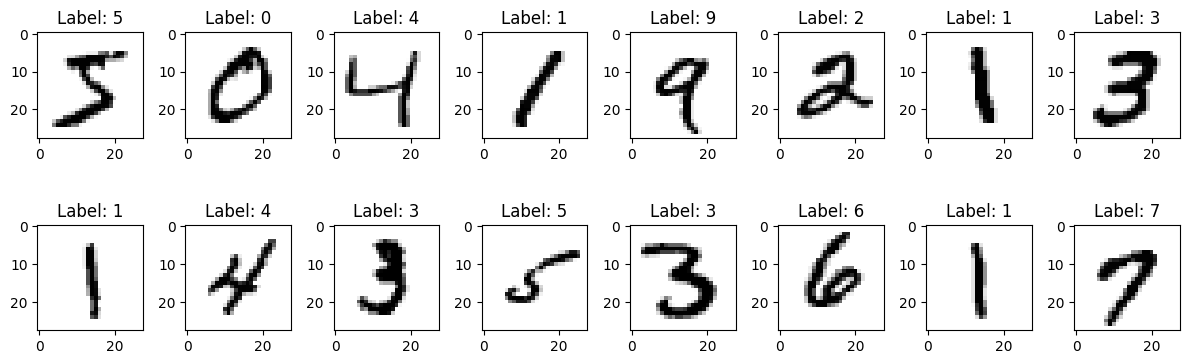

In [ ]:
#Codigo para mostrar imagenes del set, no es necesario ejecutarlo, solo imprime unos numeros :)
import matplotlib.pyplot as plt
filas = 2
columnas = 8
num = filas*columnas
imagenes = X_entrenamiento[0:num]
etiquetas = Y_entrenamiento[0:num]
fig, axes = plt.subplots(filas, columnas, figsize=(1.5*columnas,2*filas))
for i in range(num):
     ax = axes[i//columnas, i%columnas]
     ax.imshow(imagenes[i].reshape(28,28), cmap='gray_r')
     ax.set_title('Label: {}'.format(np.argmax(etiquetas[i])))
plt.tight_layout()
plt.show()

In [ ]:
#Aumento de datos
#Variables para controlar las transformaciones que se haran en el aumento de datos
#utilizando ImageDataGenerator de keras

from tensorflow.keras.preprocessing.image import ImageDataGenerator

rango_rotacion = 30
mov_ancho = 0.25
mov_alto = 0.25
#rango_inclinacion=15 #No uso este de momento pero si quieres puedes probar usandolo!
rango_acercamiento=[0.5,1.5]

datagen = ImageDataGenerator(
    rotation_range = rango_rotacion,
    width_shift_range = mov_ancho,
    height_shift_range = mov_alto,
    zoom_range=rango_acercamiento,
    #shear_range=rango_inclinacion #No uso este de momento pero si quieres puedes probar usandolo!
)

datagen.fit(X_entrenamiento)

ANTES:



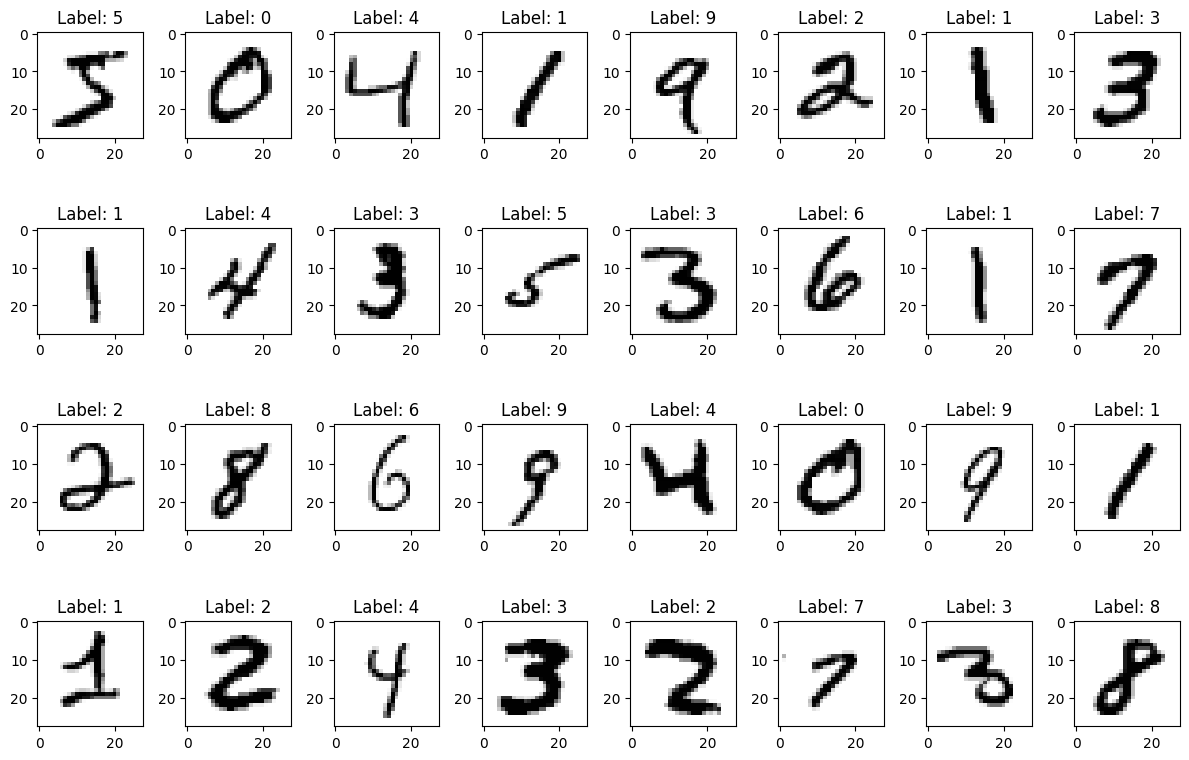

DESPUES:



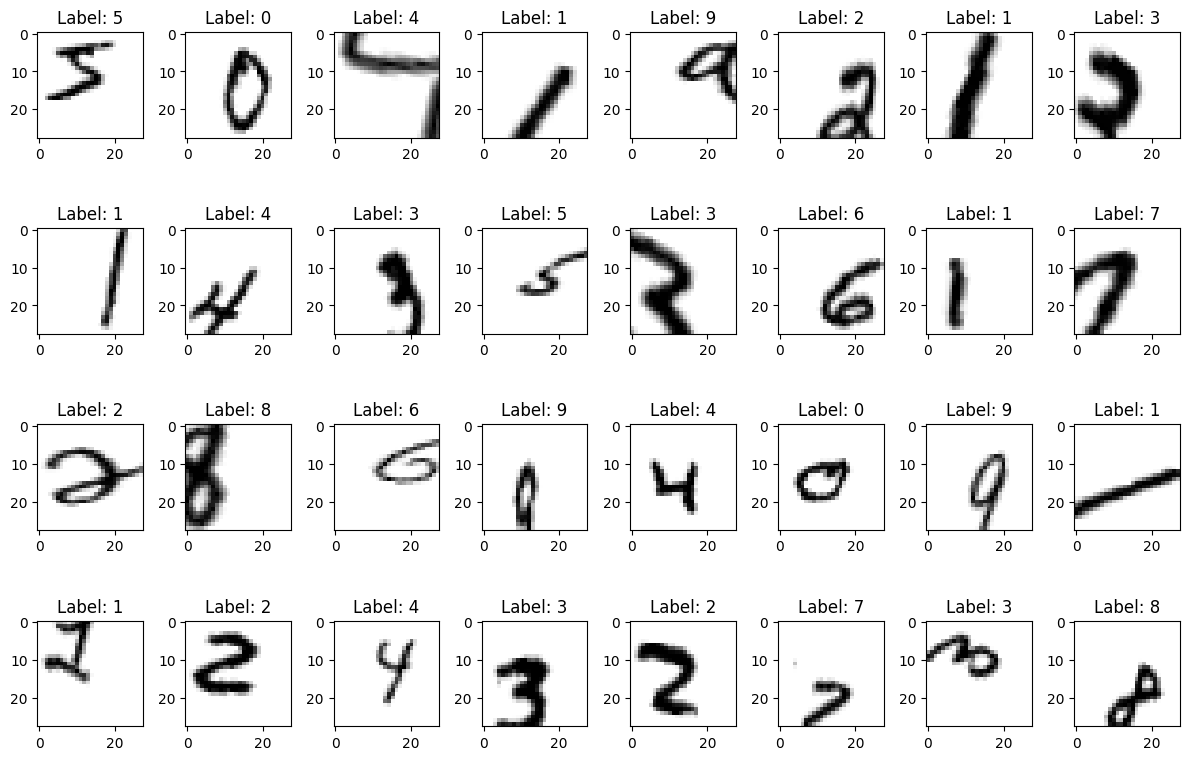

In [ ]:
#Codigo para mostrar imagenes del set, no es necesario ejecutarlo, solo imprime como se ven antes y despues de las transformaciones
filas = 4
columnas = 8
num = filas*columnas
print('ANTES:\n')
fig1, axes1 = plt.subplots(filas, columnas, figsize=(1.5*columnas,2*filas))
for i in range(num):
     ax = axes1[i//columnas, i%columnas]
     ax.imshow(X_entrenamiento[i].reshape(28,28), cmap='gray_r')
     ax.set_title('Label: {}'.format(np.argmax(Y_entrenamiento[i])))
plt.tight_layout()
plt.show()
print('DESPUES:\n')
fig2, axes2 = plt.subplots(filas, columnas, figsize=(1.5*columnas,2*filas))
for X, Y in datagen.flow(X_entrenamiento,Y_entrenamiento.reshape(Y_entrenamiento.shape[0], 10),batch_size=num,shuffle=False):
     for i in range(0, num):
          ax = axes2[i//columnas, i%columnas]
          ax.imshow(X[i].reshape(28,28), cmap='gray_r')
          ax.set_title('Label: {}'.format(int(np.argmax(Y[i]))))
     break
plt.tight_layout()
plt.show()

In [ ]:
#Modelo!
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation="softmax")
])

#Compilación
modelo.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#Los datos para entrenar saldran del datagen, de manera que sean generados con las transformaciones que indicamos
data_gen_entrenamiento = datagen.flow(X_entrenamiento, Y_entrenamiento, batch_size=32)

In [ ]:
TAMANO_LOTE = 32

#Entrenar la red. Toma un buen rato! Ve por un café ;)
#Oye suscribete al canal!
print("Entrenando modelo...");
epocas=60
history = modelo.fit(
    data_gen_entrenamiento,
    epochs=epocas,
    batch_size=TAMANO_LOTE,
    validation_data=(X_pruebas, Y_pruebas),
    steps_per_epoch=int(np.ceil(60000 / float(TAMANO_LOTE))),
    validation_steps=int(np.ceil(10000 / float(TAMANO_LOTE)))
)

print("Modelo entrenado!");

Entrenando modelo...
Epoch 1/60


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 41ms/step - accuracy: 0.4336 - loss: 1.6221 - val_accuracy: 0.9496 - val_loss: 0.2032
Epoch 2/60
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 42ms/step - accuracy: 0.7450 - loss: 0.7885 - val_accuracy: 0.9642 - val_loss: 0.1279
Epoch 3/60
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 40ms/step - accuracy: 0.7902 - loss: 0.6540 - val_accuracy: 0.9595 - val_loss: 0.1333
Epoch 4/60
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 76s 40ms/step - accuracy: 0.8145 - loss: 0.5785 - val_accuracy: 0.9693 - val_loss: 0.0982
Epoch 5/60
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 42ms/step - accuracy: 0.8293 - loss: 0.5328 - val_accuracy: 0.9673 - val_loss: 0.1109
Epoch 6/60
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 76s 41ms/step - accuracy: 0.8382 - loss: 0.4953 - val_accuracy: 0.9666 - val_loss: 0.1129
Epoch 7/60
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 75s 40ms/step - accuracy: 0.8488 - loss: 0.4676 - val_accuracy: 0.9727 - val_loss: 0.0887
Epoch 8/60
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 40ms/step - accuracy: 0.8570 - loss: 0.43

In [ ]:
#Exportar el modelo al explorador! (Mas detalle de esto en en mi video de exportacion: https://youtu.be/JpE4bYyRADI )
modelo.save('numeros_conv_ad_do.h5')

#Convertirlo a tensorflow.js
!pip install tensorflowjs

!mkdir carpeta_salida

!tensorflowjs_converter --input_format keras numeros_conv_ad_do.h5 carpeta_salida

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.1 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-bigquery 3.32.0 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.
db-dtypes 1.4.3 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.
2025-05-22 13:58:10.570974: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747922290.596701   20494 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attem

In [ ]:
!ls carpeta_salida

group1-shard1of1.bin  model.json


In [ ]:
from google.colab import files
import shutil
import os

# Comprime la carpeta en un ZIP para descargarla fácilmente
shutil.make_archive('modelo_tfjs', 'zip', 'carpeta_salida')

files.download('modelo_tfjs.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>